# Ciência de Dados para Desenvolvedores Web: Da Visualização à Análise de Texto


### Objetivo da Aula
- **Visão Geral:** Conectar o mundo do desenvolvimento web com o universo da ciência de dados, indo além da simples manipulação de dados para a extração de insights valiosos.
- **Persona:** Você é um desenvolvedor na Olist. A equipe de negócios precisa entender tendências de vendas, desempenho de produtos e o sentimento dos clientes. Sua tarefa é usar suas habilidades técnicas para responder a essas perguntas com dados.

### Nosso Estudo de Caso: O Dataset Olist
- **Fonte:** Utilizaremos o **Brazilian E-Commerce Public Dataset by Olist**, um conjunto de dados real, rico e complexo.
- **Relevância:** Ele espelha os tipos de dados que empresas geram diariamente, contendo desde dados estruturados de vendas até avaliações de clientes em texto livre.

## Configuração Inicial: Carregando e Preparando Nosso Universo de Dados

### 1. Entendendo o Esquema
- **Contexto:** Assim como em sistemas do mundo real, os dados da Olist são normalizados e distribuídos em múltiplos arquivos. Nossa primeira tarefa é unificá-los.
- **Mapa de Dados:**

| Arquivo CSV                             | Colunas Relevantes                                                    | Descrição                                                              |
| :-------------------------------------- | :-------------------------------------------------------------------- | :--------------------------------------------------------------------- |
| `olist_customers_dataset.csv`           | `customer_id`, `customer_unique_id`, `customer_state`                 | Contém dados sobre os clientes e sua localização.                      |
| `olist_orders_dataset.csv`              | `order_id`, `customer_id`, `order_status`, `order_purchase_timestamp` | Contém dados sobre os pedidos, como status e data da compra.           |
| `olist_order_items_dataset.csv`         | `order_id`, `product_id`, `price`, `freight_value`                    | Detalha os itens dentro de cada pedido, incluindo preço e frete.         |
| `olist_products_dataset.csv`            | `product_id`, `product_category_name`                                 | Contém informações sobre os produtos, como sua categoria.              |
| `olist_order_reviews_dataset.csv`       | `order_id`, `review_score`, `review_comment_message`                  | Contém as avaliações (notas e comentários) feitas pelos clientes.      |
| `product_category_name_translation.csv` | `product_category_name`, `product_category_name_english`              | Traduz os nomes das categorias de produtos para o inglês.              |

### 2. Exercício Prático: Montando o DataFrame Principal
- **Tarefa:** Carregar os arquivos CSV e uni-los em um único DataFrame analítico usando a biblioteca Pandas.

In [3]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

# Configurações iniciais para bibliotecas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except LookupError:
    print("Baixando pacotes NLTK necessários...")
    nltk.download('punkt')
    nltk.download('stopwords')

# Carregando os datasets (assumindo que estão na mesma pasta do notebook)
try:
    customers = pd.read_csv('../data/olist_customers_dataset.csv')
    orders = pd.read_csv('../data/olist_orders_dataset.csv')
    order_items = pd.read_csv('../data/olist_order_items_dataset.csv')
    products = pd.read_csv('../data/olist_products_dataset.csv')
    reviews = pd.read_csv('../data/olist_order_reviews_dataset.csv')
    translation = pd.read_csv('../data/product_category_name_translation.csv')
    print("Datasets carregados com sucesso!")
except FileNotFoundError as e:
    print(f"Erro: Arquivo não encontrado. Verifique o nome e o caminho do arquivo: {e.filename}")

# Unindo (merging) os DataFrames
df = pd.merge(orders, order_items, on='order_id')
df = pd.merge(df, products, on='product_id')
df = pd.merge(df, customers, on='customer_id')
df = pd.merge(df, reviews, on='order_id')
df = pd.merge(df, translation, on='product_category_name')

# Convertendo colunas de data para o formato datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

print("\nDataFrame unificado criado.")
print("\nPrimeiras 5 linhas do DataFrame:")
display(df.head())

print("\nColunas resultantes:")
print(df.columns.tolist())

Datasets carregados com sucesso!

DataFrame unificado criado.

Primeiras 5 linhas do DataFrame:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1,d0b61bfb1de832b15ba9d266ca96e5b0,...,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1,65266b2da20d04dbe00c5c2d3bb7859e,...,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,stationery



Colunas resultantes:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp', 'product_category_name_english']


# Parte 1: O Poder da Narrativa Visual (Fundamentos da Visualização de Dados)

### 1.1. Por que uma Imagem Vale Mais que Mil Linhas de Dados

#### 1.1.1. Os Limites das Estatísticas Resumidas: O Quarteto de Anscombe
- **Conceito:** Em 1973, o estatístico Francis Anscombe demonstrou que estatísticas descritivas quase idênticas podem esconder realidades drasticamente diferentes.
- **Relevância para Desenvolvedores:** O mundo de um dev é construído sobre precisão (`2.000`, não "~2"). O quarteto desafia essa confiança na precisão numérica isolada, mostrando que a mesma média ($9.0$) e correlação ($0.816$) podem descrever quatro cenários distintos. Isso força uma reavaliação: o contexto e a distribuição são tão vitais quanto as métricas. A pergunta muda de "Qual é a média?" para "Como é a distribuição?".
- **A Lição:** Confiar apenas em resumos numéricos é uma forma de cegueira intelectual; a visualização revela a verdade dos dados.

Estatísticas Descritivas:
           x                         y                
        mean       std count      mean       std count
dataset                                               
I        9.0  3.316625    11  7.500909  2.031568    11
II       9.0  3.316625    11  7.500909  2.031657    11
III      9.0  3.316625    11  7.500000  2.030424    11
IV       9.0  3.316625    11  7.500909  2.030579    11

Correlações (x, y):
dataset
I      0.816421
II     0.816237
III    0.816287
IV     0.816521
Name: (x, y), dtype: float64


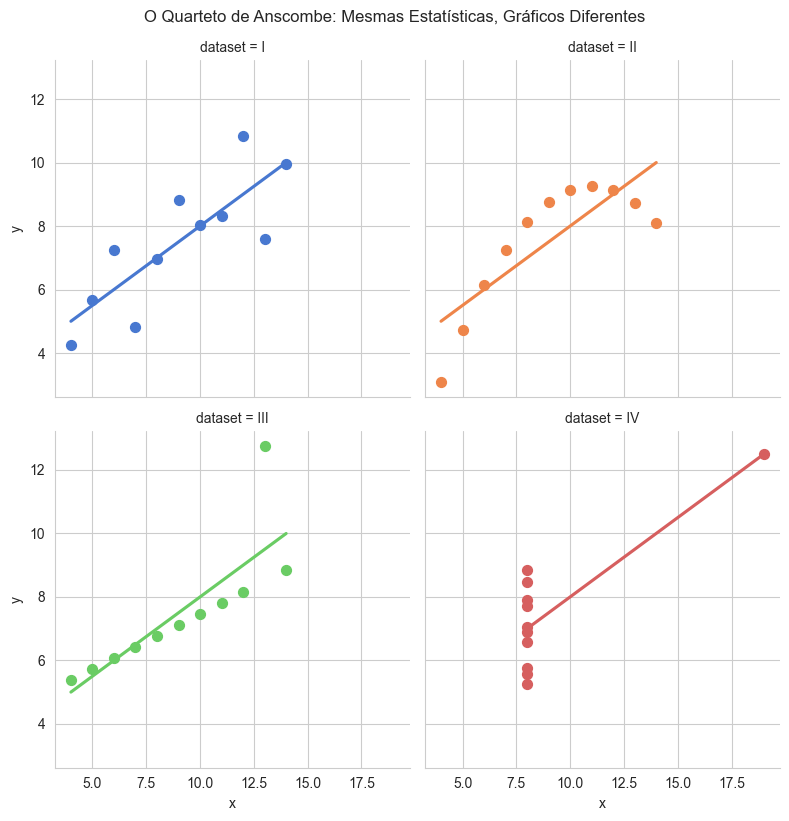

In [4]:
# Carregando o dataset de exemplo do Seaborn
anscombe = sns.load_dataset("anscombe")

# Calculando estatísticas descritivas para cada dataset do quarteto
stats = anscombe.groupby('dataset').agg(['mean', 'std', 'count'])
correlations = anscombe.groupby('dataset').corr().unstack().iloc[:, 1]

print("Estatísticas Descritivas:")
print(stats)
print("\nCorrelações (x, y):")
print(correlations)

# Visualizando o Quarteto de Anscombe
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})
plt.suptitle("O Quarteto de Anscombe: Mesmas Estatísticas, Gráficos Diferentes", y=1.02)
plt.show()

#### 1.1.2. Como Vemos os Dados: A Ciência da Percepção Visual
- **Conceito:** A visualização de dados eficaz não é arte, mas uma ciência baseada em como nosso cérebro processa informações. É uma otimização para "ciclos cerebrais".
- **Atributos Pré-atentivos:** São propriedades visuais que nosso cérebro processa em menos de 500ms, sem esforço consciente. Os mais importantes são:
  - **Comprimento:** Ideal para comparações (base dos gráficos de barras).
  - **Posição:** Processada rapidamente em eixos cartesianos (gráficos de dispersão).
  - **Cor (Matiz e Intensidade):** Usada para agrupar itens ou indicar magnitude.
  - **Tamanho:** Representa uma quantidade.
- **Analogia para Desenvolvedores:** Usar um gráfico de barras (comprimento) descarrega a tarefa lenta de "pensar" sobre números (córtex cerebral) para a parte rápida e poderosa do cérebro que "vê" (córtex visual). A escolha do gráfico correto é uma otimização de desempenho para a interface homem-computador.

### 1.2. Uma Linguagem Simples para Gráficos (A Gramática dos Gráficos)

- **Conceito:** Em vez de memorizar dezenas de tipos de gráficos, podemos aprender uma "linguagem" ou um "padrão de design" para construir visualizações. Este conceito, conhecido como a **Gramática dos Gráficos**, descreve os componentes de um gráfico de forma estruturada.
- **As 3 Camadas Essenciais:**
  1.  **Dados (Data):** O DataFrame que contém as informações (nosso `df` unificado).
  2.  **Estética (Aesthetics - `aes`):** O mapeamento das colunas dos dados para as propriedades visuais do gráfico (ex: `price` -> eixo Y, `product_category` -> cor).
  3.  **Geometrias (Geometries - `geom`):** As formas visuais que representam os dados (pontos, linhas, barras).
- **Mudança de Mentalidade:** A abordagem muda de "preciso de uma função para gráfico de dispersão" para "preciso representar meus dados com *pontos*, mapeando a variável A para X e a variável B para Y". É um modelo mental mais poderoso e extensível.

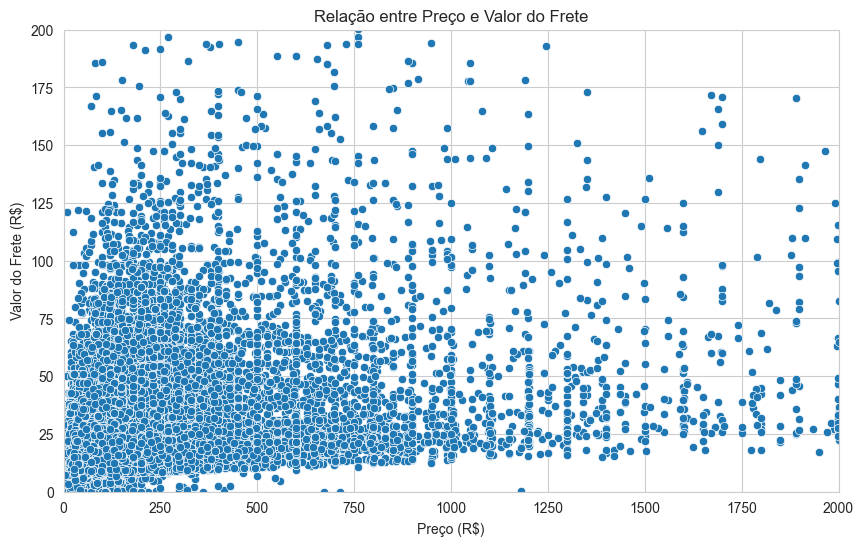

In [5]:
# Exemplo prático da Gramática dos Gráficos com Seaborn

# 1. Dados: Usaremos nosso DataFrame 'df'
# 2. Estética: Mapearemos 'price' para o eixo x e 'freight_value' para o eixo y
# 3. Geometria: Usaremos pontos (scatter)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='freight_value') # Aqui definimos as 3 camadas
plt.title('Relação entre Preço e Valor do Frete')
plt.xlabel('Preço (R$)')
plt.ylabel('Valor do Frete (R$)')
# Limitando os eixos para melhor visualização, pois há outliers
plt.xlim(0, 2000)
plt.ylim(0, 200)
plt.show()

### 1.3. O Kit de Ferramentas Essencial: Escolhendo o Gráfico Certo

| Objetivo                                           | Gráfico Recomendado  |
| :------------------------------------------------- | :------------------- |
| Comparar valores entre diferentes categorias       | Gráfico de Barras    |
| Mostrar uma tendência ou mudança ao longo do tempo   | Gráfico de Linhas    |
| Entender a distribuição de frequência de um número | Histograma           |
| Investigar a relação entre duas variáveis numéricas | Gráfico de Dispersão |
| Comparar distribuições e encontrar outliers        | Box Plot             |

#### 1.3.1. Gráficos de Barras: Comparando Categorias
- **Propósito:** Comparar um valor numérico entre categorias discretas. Nossos cérebros são excelentes em comparar comprimentos a partir de uma linha de base comum.
- **Exemplo Olist:** Quais categorias de produtos têm o maior valor médio de frete?


/var/folders/jl/02kt03gj5n99h1czkswp582c0000gn/T/ipykernel_19151/2740039187.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_freight_by_category.values, y=avg_freight_by_category.index, palette='viridis')


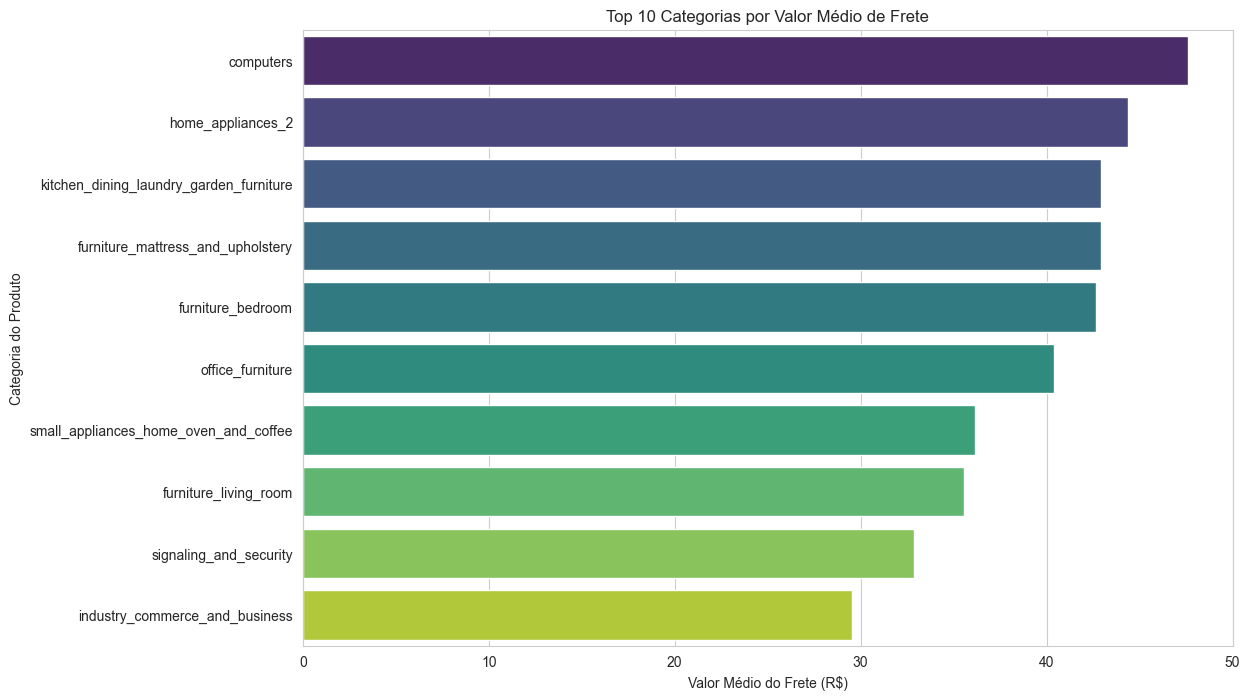

In [6]:
# Calculando o valor médio do frete por categoria
avg_freight_by_category = df.groupby('product_category_name_english')['freight_value'].mean().sort_values(ascending=False).head(10)

# Criando o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_freight_by_category.values, y=avg_freight_by_category.index, palette='viridis')
plt.title('Top 10 Categorias por Valor Médio de Frete')
plt.xlabel('Valor Médio do Frete (R$)')
plt.ylabel('Categoria do Produto')
plt.show()

- **Boas Práticas:**
  - Sempre inicie o eixo de valor em zero para evitar comparações enganosas.
  - Ordene as barras (maior para menor ou vice-versa) para facilitar a leitura.
- **Exercício:** Gere um gráfico de barras **horizontal** mostrando o número total de pedidos para os 10 principais estados dos clientes. *Por que horizontal?* Porque os nomes dos estados podem ser longos e são mais fáceis de ler no eixo Y.

/var/folders/jl/02kt03gj5n99h1czkswp582c0000gn/T/ipykernel_19151/1676784988.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='flare')


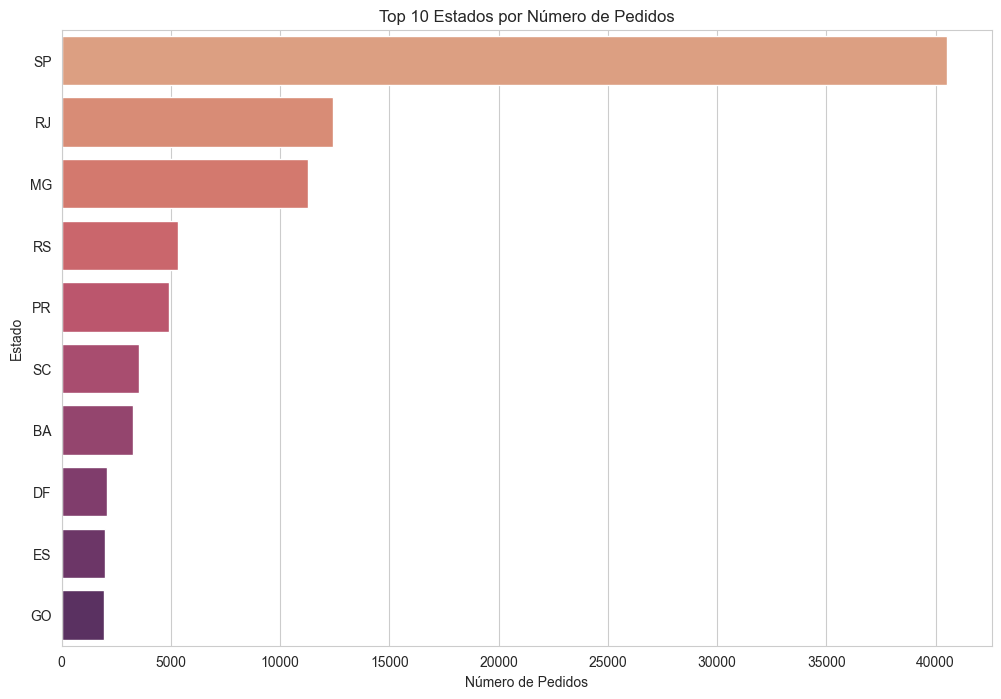

In [7]:
# Solução do Exercício 1.3.1
top_10_states = df.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_states.values, y=top_10_states.index, palette='flare')
plt.title('Top 10 Estados por Número de Pedidos')
plt.xlabel('Número de Pedidos')
plt.ylabel('Estado')
plt.show()

#### 1.3.2. Gráficos de Linhas: Acompanhando Tendências ao Longo do Tempo
- **Propósito:** Visualizar a tendência de uma variável contínua, geralmente ao longo do tempo. As linhas de conexão enfatizam a progressão e a taxa de mudança.
- **Exemplo Olist:** Como as vendas da Olist evoluíram ao longo do tempo?

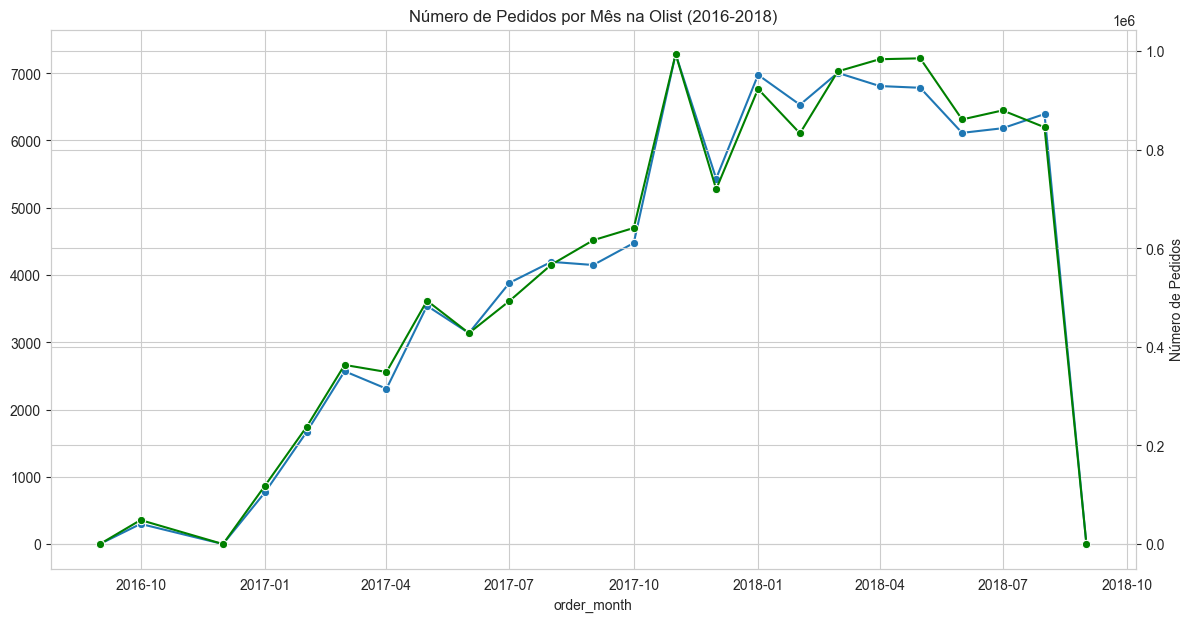

In [13]:
# Agrupando os pedidos por mês
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_orders = df.groupby('order_month')['order_id'].nunique()
monthly_revenue = df.groupby('order_month')['price'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

fig, ax1 = plt.subplots(figsize=(14, 7))
# Convertendo o período para timestamp para plotagem
monthly_orders.index = monthly_orders.index.to_timestamp()

# Criando o gráfico de linhas
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o')
ax2 = ax1.twinx()
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='green')
plt.title('Número de Pedidos por Mês na Olist (2016-2018)')
plt.xlabel('Mês da Compra')
plt.ylabel('Número de Pedidos')
plt.show()

- **Boas Práticas:**
  - Use para dados contínuos, não para categorias discretas sem ordem intrínseca.
  - Certifique-se de que o eixo do tempo tenha intervalos regulares.
- **Exercício:** Plote a **receita** mensal (soma de `price`) em um gráfico de linhas. A tendência da receita espelha a tendência do número de pedidos? O que poderia explicar eventuais diferenças?

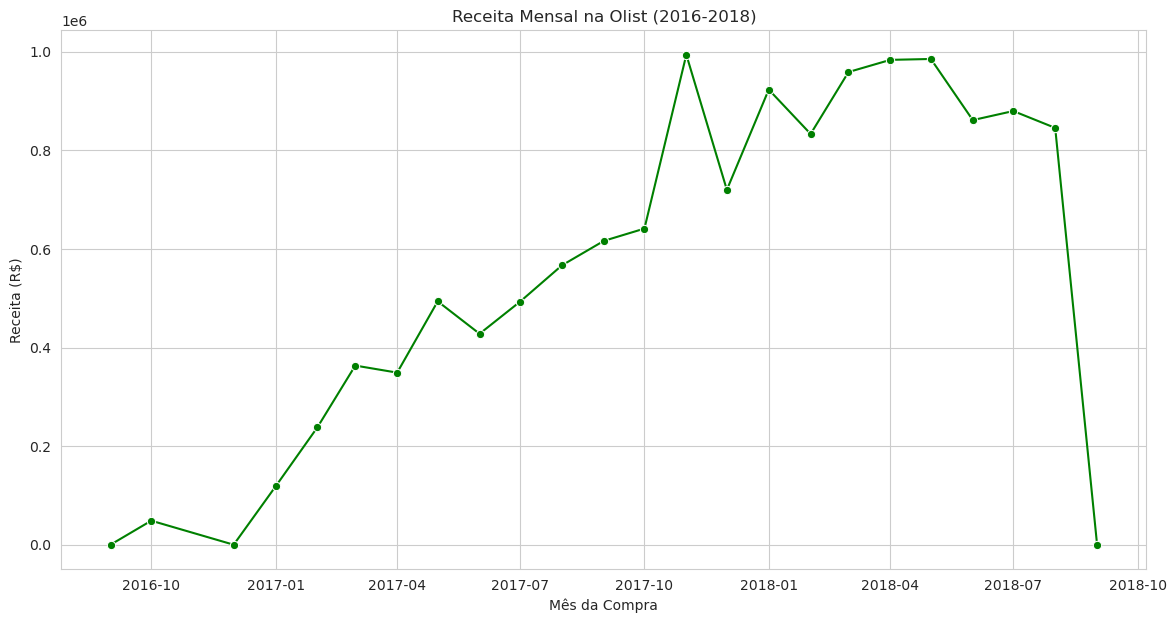

In [12]:
monthly_revenue = df.groupby('order_month')['price'].sum()
monthly_revenue.index = monthly_revenue.index.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='green')
plt.title('Receita Mensal na Olist (2016-2018)')
plt.xlabel('Mês da Compra')
plt.ylabel('Receita (R$)')
plt.show()

#### 1.3.3. Histogramas: Entendendo Distribuições
- **Propósito:** Entender a distribuição de frequência de uma única variável numérica contínua, agrupando os valores em "bins" ou intervalos. Ao contrário de um gráfico de barras, não há espaços entre as barras, significando um intervalo contínuo.
- **Exemplo Olist:** Qual é a distribuição dos preços dos itens vendidos?

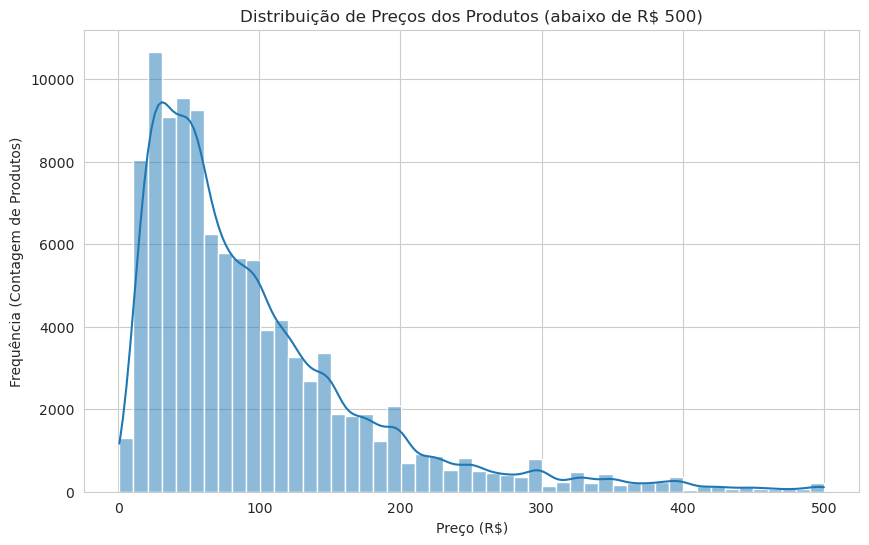

In [14]:
# Filtrando para uma faixa de preço mais comum para melhor visualização
prices_filtered = df[df['price'] < 500]['price']

# Criando o histograma
plt.figure(figsize=(10, 6))
sns.histplot(prices_filtered, bins=50, kde=True) # kde=True adiciona uma linha de estimativa de densidade
plt.title('Distribuição de Preços dos Produtos (abaixo de R$ 500)')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência (Contagem de Produtos)')
plt.show()

- **Boas Práticas:**
  - A escolha da largura dos "bins" é crucial e pode alterar a história que o gráfico conta. Experimente com diferentes números de bins.
- **Exercício:** Crie um histograma para a coluna `freight_value`. Filtre outliers extremos (ex: fretes > R$ 200) para obter uma visão melhor da distribuição principal. Qual é a faixa de frete mais comum?

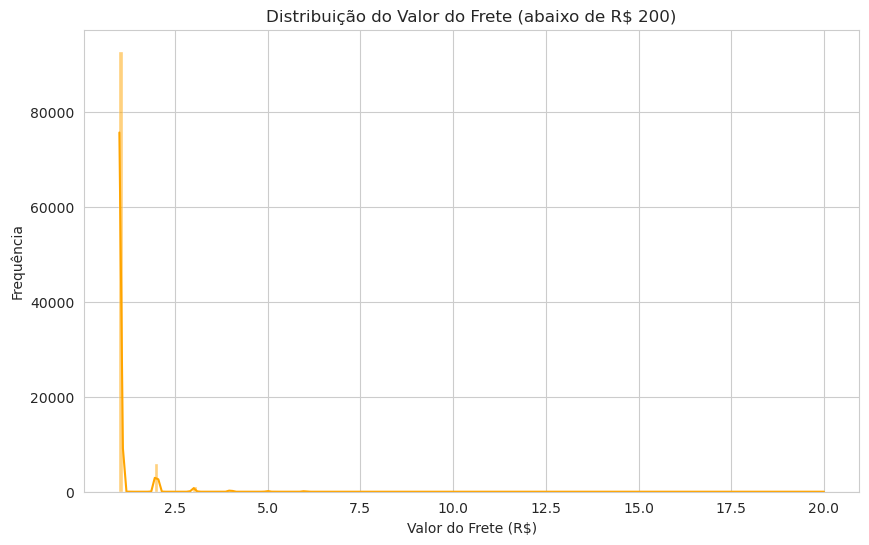

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,review_score
count,110750,108457,110750,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110750.000000,110749.000000,110749.000000,110749.000000,110749.000000,110750.000000,110750.000000
mean,2018-01-01 12:44:37.691458560,2018-01-15 00:21:00.601399808,2018-01-25 08:59:40.301580544,1.196397,120.475691,20.012513,48.776135,786.798230,2.206980,2096.696097,30.210377,16.607744,23.046709,35123.682257,4.035395
min,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-10-04 00:00:00,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1003.000000,1.000000
25%,2017-09-14 08:05:20,2017-09-26 23:18:38,2017-10-05 00:00:00,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,11310.000000,4.000000
50%,2018-01-20 22:39:33,2018-02-03 18:38:41,2018-02-16 00:00:00,1.000000,74.900000,16.290000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,24320.000000,5.000000
75%,2018-05-05 15:14:23.750000128,2018-05-16 12:53:08,2018-05-28 00:00:00,1.000000,134.900000,21.170000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,59054.000000,5.000000
max,2018-09-03 09:06:57,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99980.000000,5.000000
std,NaN,NaN,NaN,0.692883,181.861574,15.815047,10.025553,651.643826,1.719776,3751.652718,16.175517,13.462204,11.717480,29882.476174,1.385325


In [29]:
# Solução do Exercício 1.3.3
freight_filtered = df.groupby('order_id')['product_id'].value_counts()# [df['freight_value'] < 200]['freight_value']
#print(freight_filtered[freight_filtered>20])
plt.figure(figsize=(10, 6))
sns.histplot(freight_filtered, bins=200, kde=True, color='orange')
plt.title('Distribuição do Valor do Frete (abaixo de R$ 200)')
plt.xlabel('Valor do Frete (R$)')
plt.ylabel('Frequência')
plt.show()
df.describe()

#### 1.3.4. Gráficos de Dispersão: Investigando Relações
- **Propósito:** Observar a relação e a correlação entre duas variáveis numéricas contínuas.
- **Exemplo Olist:** O peso de um item afeta seu custo de frete?

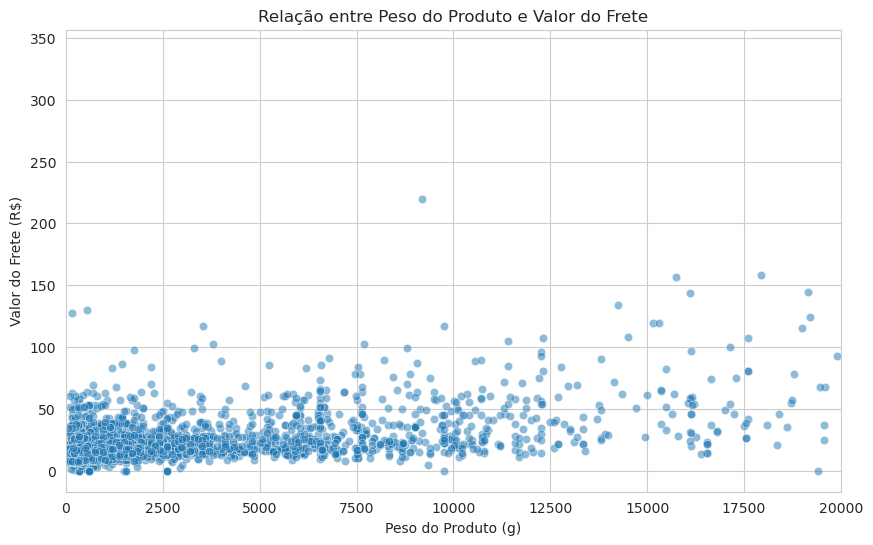

In [30]:
# Amostrando os dados para evitar sobreposição excessiva de pontos (overplotting)
df_sample = df.sample(n=5000, random_state=42)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='product_weight_g', y='freight_value', alpha=0.5)
plt.title('Relação entre Peso do Produto e Valor do Frete')
plt.xlabel('Peso do Produto (g)')
plt.ylabel('Valor do Frete (R$)')
plt.xlim(0, 20000) # Limitando o eixo x para melhor visualização
plt.show()

- **Boas Práticas:**
  - Cuidado para não inferir **causalidade** a partir da **correlação**. Gráficos de dispersão identificam relações *potenciais* para investigação futura.
- **Exercício:** Crie um gráfico de dispersão de `price` vs `freight_value`. Existe uma correlação mais forte aqui do que entre o peso e o valor do frete? Por que isso faria sentido do ponto de vista do negócio?

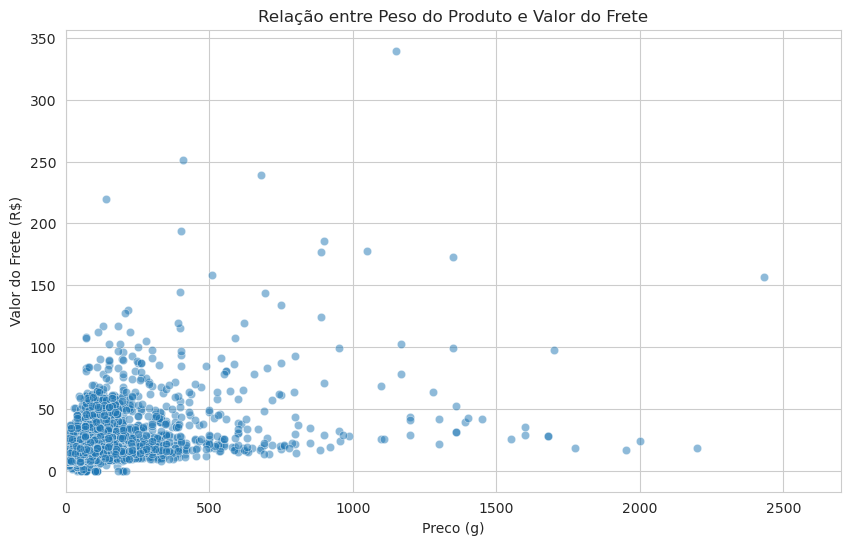

In [33]:
# Amostrando os dados para evitar sobreposição excessiva de pontos (overplotting)
df_sample = df.sample(n=5000, random_state=42)

# Criando o gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x='price', y='freight_value', alpha=0.5)
plt.title('Relação entre Peso do Produto e Valor do Frete')
plt.xlabel('Preco (g)')
plt.ylabel('Valor do Frete (R$)')
plt.xlim(0, 2700) # Limitando o eixo x para melhor visualização
plt.show()

#### 1.3.5. Box Plots: Comparando Distribuições e Encontrando Outliers
- **Propósito:** Visualizar o resumo de cinco números (mínimo, 1º quartil, mediana, 3º quartil, máximo). É poderoso para comparar distribuições entre categorias e identificar outliers.
- **Exemplo Olist:** As notas de avaliação variam entre as categorias de produtos mais vendidas?

/tmp/ipykernel_7948/3925003114.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5, x='review_score', y='product_category_name_english', palette='coolwarm')


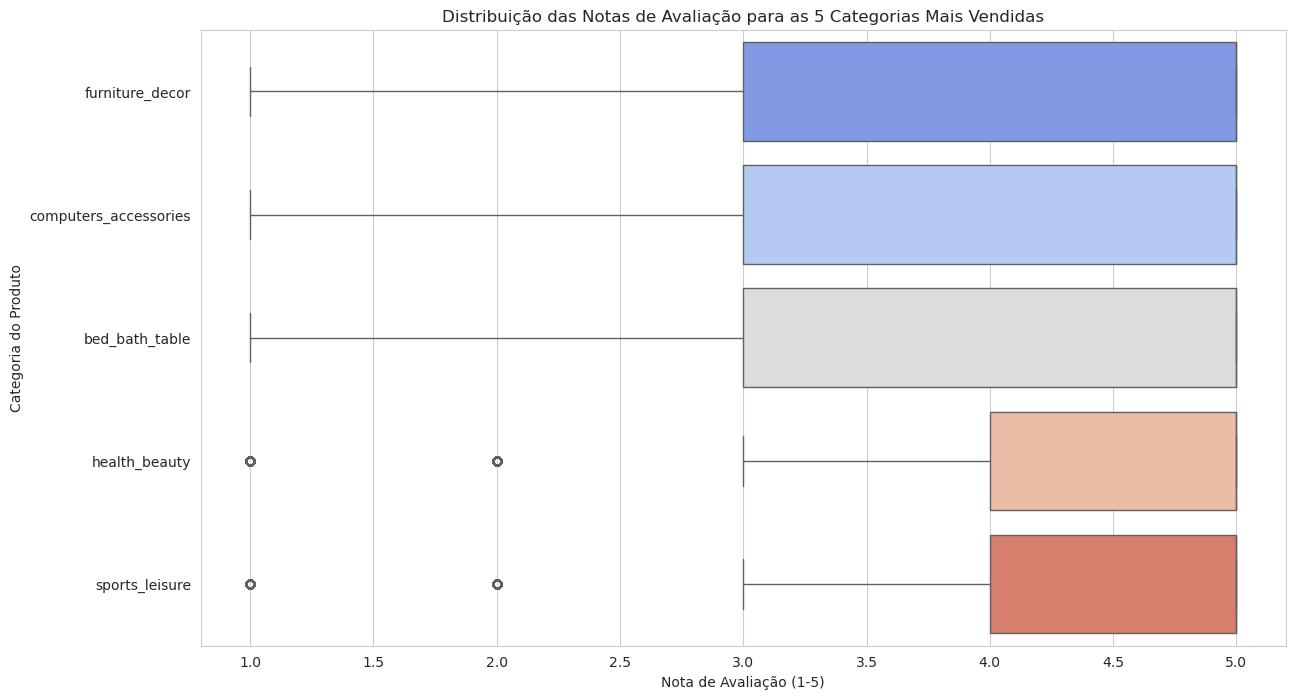

In [34]:
# Identificando as 5 categorias mais vendidas
top_5_categories = df['product_category_name_english'].value_counts().head(5).index

# Filtrando o DataFrame para incluir apenas essas categorias
df_top5 = df[df['product_category_name_english'].isin(top_5_categories)]

# Criando os box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top5, x='review_score', y='product_category_name_english', palette='coolwarm')
plt.title('Distribuição das Notas de Avaliação para as 5 Categorias Mais Vendidas')
plt.xlabel('Nota de Avaliação (1-5)')
plt.ylabel('Categoria do Produto')
plt.show()

- **Boas Práticas:**
  - Saiba interpretar os componentes: a caixa é o intervalo interquartil (IQR), a linha no meio é a mediana, e os "bigodes" (whiskers) geralmente se estendem até $1.5 \times IQR$. Pontos além são outliers.
  - A posição da mediana e o comprimento dos bigodes indicam a assimetria (skewness) da distribuição.
- **Exercício:** Calcule o tempo de entrega real em dias (`order_delivered_customer_date` - `order_purchase_timestamp`). Crie box plots para comparar a distribuição do tempo de entrega entre as 5 categorias de produtos mais vendidas. Existem categorias entregues mais rápido que outras?

/tmp/ipykernel_3260/1464909128.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top5_delivery, x='delivery_time_days', y='product_category_name_english', palette='plasma')


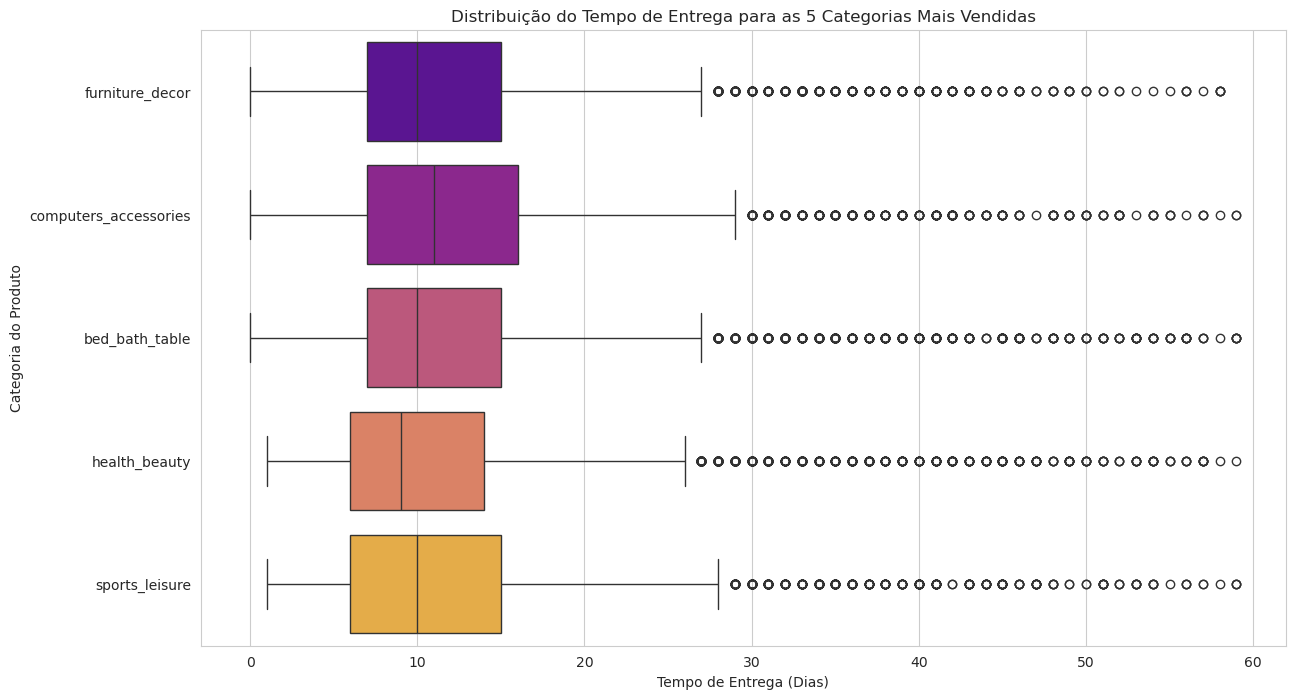

# Parte 2: Domando os Dados da Web (Dados Semi-estruturados e Não Estruturados)

### 2.1. Lidando com JSON - A Linguagem das APIs Web

#### 2.1.1. O Desafio: Estruturas Aninhadas
- **Contexto:** JSON é o padrão para APIs REST. Sua flexibilidade é ótima para aplicações, mas sua natureza aninhada (objetos dentro de objetos, listas) é incompatível com a estrutura tabular plana exigida por ferramentas de análise.

#### 2.1.2. Exemplo Prático: Criando e Achatando um JSON
- **Tarefa:** Simular uma resposta de API criando um JSON aninhado a partir do nosso DataFrame e depois "achatá-lo" para um formato tabular.

In [35]:
# Criando uma estrutura de dados aninhada simulando uma resposta de API
# Vamos pegar 2 pedidos como exemplo
sample_orders_json = df[df['order_id'].isin(df['order_id'].unique()[:2])].copy()

# Agrupando os itens de cada pedido em uma lista de dicionários
nested_json_list = (sample_orders_json.groupby(['order_id', 'customer_city'])
                   .apply(lambda x: x[['product_id', 'price', 'freight_value']].to_dict('records'))
                   .reset_index(name='items')
                   .to_dict('records'))

print("Estrutura JSON Aninhada (simulando resposta de API):")
print(json.dumps(nested_json_list, indent=2))

Estrutura JSON Aninhada (simulando resposta de API):
[
  {
    "order_id": "53cdb2fc8bc7dce0b6741e2150273451",
    "customer_city": "barreiras",
    "items": [
      {
        "product_id": "595fac2a385ac33a80bd5114aec74eb8",
        "price": 118.7,
        "freight_value": 22.76
      }
    ]
  },
  {
    "order_id": "e481f51cbdc54678b7cc49136f2d6af7",
    "customer_city": "sao paulo",
    "items": [
      {
        "product_id": "87285b34884572647811a353c7ac498a",
        "price": 29.99,
        "freight_value": 8.72
      }
    ]
  }
]


/tmp/ipykernel_7948/1909562332.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['product_id', 'price', 'freight_value']].to_dict('records'))


#### 2.1.3. A Solução: `pandas.json_normalize`
- **Ferramenta:** A função `pandas.json_normalize()` é a solução ideal para transformar estruturas aninhadas em tabelas planas.
- **Analogia para Desenvolvedores (ETL):** O processo de "achatar" um JSON é um mini-pipeline de **ETL (Extração, Transformação, Carga)**.
  - **Extração:** Obter os dados da API (o que já fazemos).
  - **Transformação:** Usar `json_normalize` para reestruturar os dados.
  - **Carga:** Carregar o resultado em um DataFrame para análise.
Isso conecta uma atividade familiar de desenvolvimento a um conceito central de engenharia de dados.

In [36]:
# Usando json_normalize para achatar a estrutura
df_flat = pd.json_normalize(
    data=nested_json_list, # A lista de dicionários que criamos
    record_path=['items'],  # A chave que contém a lista a ser "explodida" em novas linhas
    meta=['order_id', 'customer_city']  # Chaves do nível superior a serem repetidas para cada item
)

print("\nDataFrame Achatado:")
display(df_flat)


DataFrame Achatado:


,product_id,price,freight_value,order_id,customer_city
0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,53cdb2fc8bc7dce0b6741e2150273451,barreiras
1,87285b34884572647811a353c7ac498a,29.99,8.72,e481f51cbdc54678b7cc49136f2d6af7,sao paulo


#### 2.1.4. Exercício
- **Tarefa:** Crie uma estrutura JSON aninhada onde cada entrada representa uma `product_category_name_english` e contém uma lista aninhada de todas as avaliações para essa categoria (incluindo `review_score` e `review_comment_message`). Em seguida, use `json_normalize` para achatar essa estrutura de volta a um DataFrame onde cada linha é uma única avaliação, mas também contém o nome da categoria.

DataFrame Achatado de Avaliações por Categoria:


/tmp/ipykernel_3260/2001699863.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x[['review_score', 'review_comment_message']].dropna().to_dict('records'))


,review_score,review_comment_message,product_category_name_english
0,4,Ótimo produto,auto
1,4,Gostei do que comprei e ficou muito legal na moto,auto
2,4,Prático!,auto
3,5,Comprei a cada de pneu. Chegou conforme combin...,auto
4,5,ESPETACULAR.,auto


### 2.2. Introdução à Análise de Texto (Processamento de Linguagem Natural - PLN)

- **Contexto:** Chegamos aos dados não estruturados. A coluna `review_comment_message` é um exemplo perfeito: texto em português, com gírias, erros de digitação e sem formatação.
- **Objetivo do PLN Básico:** Converter texto desordenado em um formato estruturado que possa ser contado, medido e analisado.

#### 2.2.1. Primeiro Passo: Tokenização (Quebrando o Texto em Palavras)
- **Conceito:** É o processo de dividir um texto em uma lista de seus componentes, ou "tokens" — geralmente palavras e pontuação.
- **Biblioteca:** NLTK (Natural Language Toolkit), padrão para PLN em Python.

In [37]:
# Pegando um comentário de exemplo
sample_review = df['review_comment_message'].dropna().iloc[0]
print(f"Comentário Original: {sample_review}")

# Tokenizando o comentário
#nltk.download('punkt')
#nltk.download('punkt_tab')
tokens = word_tokenize(sample_review, language='portuguese')
print(f"\nTokens: {tokens}")

Comentário Original: Não testei o produto ainda, mas ele veio correto e em boas condições. Apenas a caixa que veio bem amassada e danificada, o que ficará chato, pois se trata de um presente.

Tokens: ['Não', 'testei', 'o', 'produto', 'ainda', ',', 'mas', 'ele', 'veio', 'correto', 'e', 'em', 'boas', 'condições', '.', 'Apenas', 'a', 'caixa', 'que', 'veio', 'bem', 'amassada', 'e', 'danificada', ',', 'o', 'que', 'ficará', 'chato', ',', 'pois', 'se', 'trata', 'de', 'um', 'presente', '.']


#### 2.2.2. Segundo Passo: Limpando o Ruído (Removendo Stop Words)
- **Conceito:** *Stop words* são palavras comuns e de baixa informação (`o`, `a`, `de`, `que`, `e`) que são removidas para focar a análise nas palavras mais significativas.
- **Analogia para Desenvolvedores:** A remoção de *stop words* é uma forma de **redução de dimensionalidade** para texto. É o equivalente a filtrar logs para ver apenas `ERROR` ou usar `WHERE` em SQL para remover linhas irrelevantes. Estamos filtrando o "ruído" para focar no "sinal".

In [38]:
# Carregando stop words em português
stop_words = set(stopwords.words('portuguese'))

# Filtrando os tokens (removendo stop words e mantendo apenas palavras alfabéticas)
filtered_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
print(f"\nTokens Filtrados (sem stop words e pontuação): {filtered_tokens}")


Tokens Filtrados (sem stop words e pontuação): ['testei', 'produto', 'ainda', 'veio', 'correto', 'boas', 'condições', 'apenas', 'caixa', 'veio', 'bem', 'amassada', 'danificada', 'ficará', 'chato', 'pois', 'trata', 'presente']


#### 2.2.3. Exercício Final (Juntando Tudo)
- **Tarefa:**
  1. Selecione todas as avaliações com nota 1 (`review_score == 1`) que tenham uma mensagem de comentário.
  2. Escreva um script que itere sobre cada uma dessas avaliações negativas.
  3. Para cada avaliação, realize a tokenização e a remoção de *stop words* e pontuação.
  4. Agregue todas as palavras restantes em uma única lista.
  5. Use `collections.Counter` para encontrar as 20 palavras mais comuns em avaliações negativas.
- **Objetivo:** Partir de texto bruto e não estruturado para chegar a um insight de negócio concreto e acionável. Que problemas essas palavras sugerem (ex: "demorou", "errado", "problema", "entrega")?

In [39]:
# Solução do Exercício 2.2.3

# 1. Selecionar avaliações negativas com comentários
negative_reviews = df[(df['review_score'] == 1) & (df['review_comment_message'].notna())]['review_comment_message']

all_negative_words = []
stop_words = set(stopwords.words('portuguese'))

# 2 & 3. Iterar, tokenizar e limpar
for review in negative_reviews:
    tokens = word_tokenize(review, language='portuguese')
    cleaned_tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalpha()]
    # 4. Agregar palavras
    all_negative_words.extend(cleaned_tokens)

# 5. Contar as palavras mais comuns
word_counts = Counter(all_negative_words)

print("As 20 palavras mais comuns em avaliações negativas:")
for word, count in word_counts.most_common(200):
    print(f"{word}: {count}")

As 20 palavras mais comuns em avaliações negativas:
produto: 5411
recebi: 3828
comprei: 2368
veio: 1518
entregue: 1476
ainda: 1448
entrega: 1237
chegou: 1176
nao: 989
pedido: 973
apenas: 918
compra: 898
agora: 761
produtos: 740
dois: 736
dia: 729
prazo: 723
loja: 694
nada: 541
quero: 537
contato: 534
pois: 514
site: 514
duas: 498
lannister: 486
aguardando: 478
nota: 469
somente: 447
fiz: 438
outro: 437
unidades: 421
momento: 413
paguei: 410
resposta: 408
dias: 393
faltando: 369
retorno: 368
aguardo: 365
porém: 363
entregaram: 359
pra: 353
qualidade: 346
fiscal: 341
pedi: 336
correios: 336
receber: 334
dinheiro: 326
problema: 323
falta: 303
recomendo: 296
saber: 288
empresa: 284
ate: 276
mercadoria: 276
vou: 271
diferente: 264
errado: 263
hoje: 260
devolução: 256
q: 256
so: 254
ter: 252
troca: 248
gostaria: 245
nenhuma: 239
valor: 236
cor: 234
sendo: 233
frete: 229
kit: 226
preciso: 223
outra: 213
defeito: 212
caixa: 212
ja: 206
consta: 204
consigo: 202
vez: 200
ninguém: 198
nunca: 198


# Conclusão

Ao longo desta aula, realizamos uma transição fundamental: de desenvolvedores que consomem e apresentam dados para analistas que os interrogam e extraem valor deles.

**O que conquistamos:**
- **Visualização com Propósito:** Entendemos que visualizar dados é uma necessidade para evitar conclusões equivocadas (Quarteto de Anscombe) e que sua eficácia reside na otimização cognitiva (atributos pré-atentivos).
- **Linguagem de Gráficos:** Desmistificamos a criação de visualizações com a Gramática dos Gráficos (dados, estética, geometria), um conceito análogo aos padrões de design de software.
- **Kit de Ferramentas Prático:** Dominamos cinco tipos de gráficos essenciais para responder a uma vasta gama de perguntas de negócio.
- **Domínio de Dados da Web:** Aprendemos a achatar o JSON aninhado de APIs, construindo uma ponte direta entre o desenvolvimento de aplicações e a ciência de dados.
- **Análise de Texto Inicial:** Demos os primeiros passos no Processamento de Linguagem Natural, aprendendo a limpar texto para extrair as palavras que carregam o maior peso de significado.

A jornada de um desenvolvedor para a ciência de dados é uma extensão natural de suas habilidades. As ferramentas e técnicas apresentadas aqui são o próximo passo, permitindo não apenas construir sistemas que *usam* dados, mas também gerar insights que *direcionam* o negócio.